<a href="https://colab.research.google.com/github/jeanlr16/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_de_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Hong Kong*
*by Jean Lima Rodovalho*

---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, e o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Hong Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados usados neste dataset foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para está análise exploratória será baixado apenas o seguinte arquivo:
* `listings.csv` - *Summary information and metrics for listings in Hong Kong.*

Observação: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/china/hk/hong-kong/2021-09-24/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.



In [57]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importando plotly
import plotly.express as px

%matplotlib inline

In [58]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2021-09-24/visualisations/listings.csv")

## Análise dos Dados

Esta etapa permite compreender como os dados estão estruturados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - O número de avaliações que a listagem tem (nos últimos 12 meses)
* `license` - número de registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [59]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17891,Large Light Filled Loft,69063,Candace,NaN,Central & Western,22.28327,114.14988,Entire home/apt,1400,2,73,2017-11-29,1.08,1,318,0,NaN
1,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28350,114.14854,Entire home/apt,1429,2,135,2019-08-03,1.20,1,103,1,NaN
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28418,114.15431,Entire home/apt,690,2,274,2019-11-17,3.08,9,252,2,NaN
3,104626,Entire Flat - Next to Man Mo Temple,544166,Celine,NaN,Central & Western,22.28360,114.14790,Entire home/apt,2556,1,14,2012-01-13,0.12,1,365,0,NaN
4,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28921,114.14325,Entire home/apt,849,2,209,2020-08-07,2.48,9,116,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Iremos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [60]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 6046
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Podemos verificar que as variaveis "license" e "neighbourhoo_group" possuem 100% dos seus valores ausentes.
* As variaveis "reviews_per_month" e "last_review" possuem 50% dos seus valores ausentes.

In [61]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.507278
last_review                       0.507278
name                              0.000165
host_name                         0.000165
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

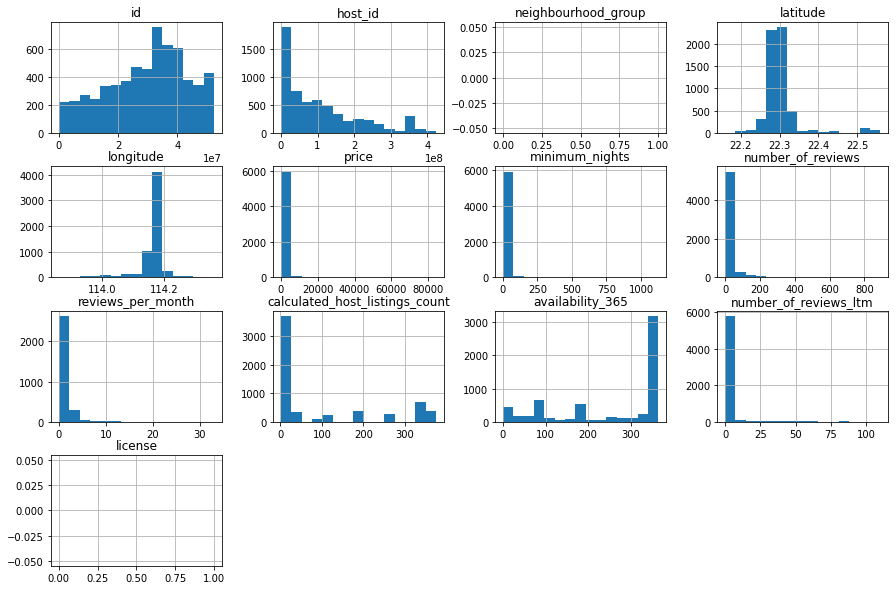

In [62]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**



Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [63]:
# ver se há outliers
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6046.000000,6046.000000,6046.000000,2979.000000,6046.000000,6046.000000
mean,805.042011,17.020179,17.616441,0.873887,96.623222,256.530433
std,2265.673954,30.101778,45.933792,1.431286,137.080163,132.468923
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,214.000000,1.000000,0.000000,0.100000,3.000000,116.000000
50%,397.500000,5.000000,0.000000,0.360000,11.000000,358.000000
75%,700.000000,29.000000,10.000000,1.060000,185.000000,364.000000
max,84346.000000,1125.000000,891.000000,33.000000,376.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 700, porém seu valor máximo é 84346.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

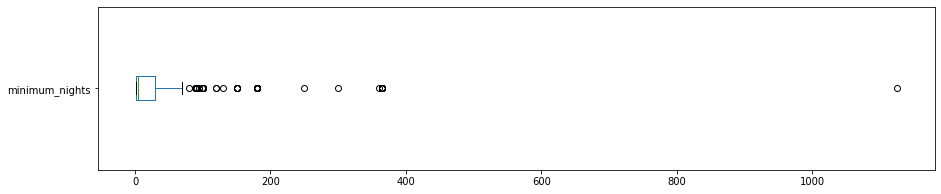

minimum_nights: valores acima de 30:
207 entradas
3.4238%


In [64]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 45 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 45])))
print("{:.4f}%".format((len(df[df.minimum_nights > 45]) / df.shape[0])*100))

#Boxplot para price

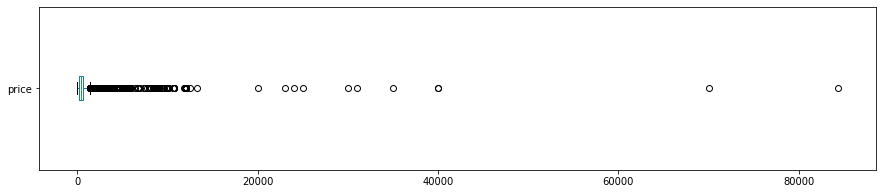


price: valores acima de 3000
187 entradas
3.0930%


In [65]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 3000 para price
print("\nprice: valores acima de 3000")
print("{} entradas".format(len(df[df.price > 3000])))
print("{:.4f}%".format((len(df[df.price > 3000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

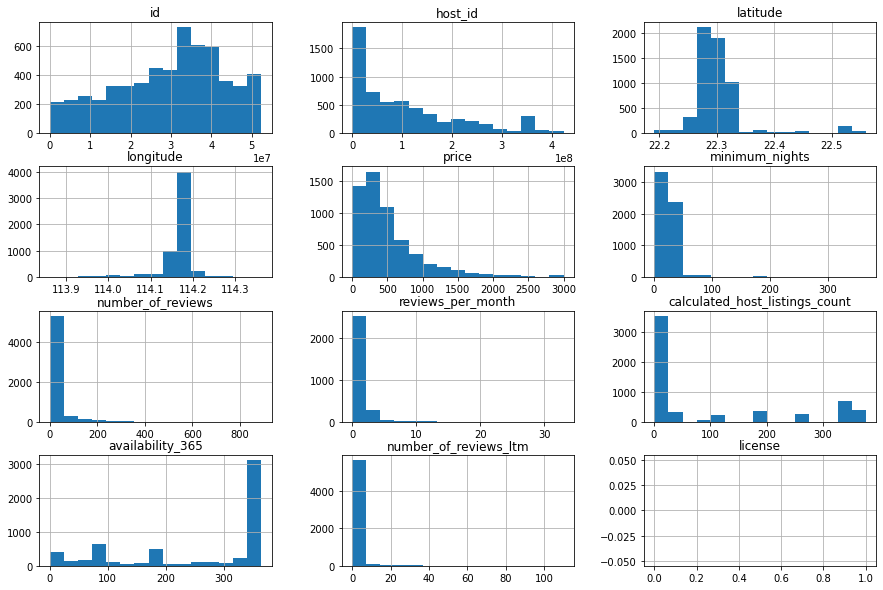

In [66]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 450].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**
Com nosso novo dataset, iremos verificar qual é a média de preços praticados.

In [67]:
# ver a média da coluna `price``
df_clean.price.mean()


536.3125640150222

### **Q6. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. 

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [68]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.131089,0.070612,0.113123,-0.380575,-0.136451
minimum_nights,-0.131089,1.000000,-0.132350,-0.065613,0.316144,0.222615
number_of_reviews,0.070612,-0.132350,1.000000,0.640452,-0.247488,-0.219256
reviews_per_month,0.113123,-0.065613,0.640452,1.000000,-0.142859,-0.145319
calculated_host_listings_count,-0.380575,0.316144,-0.247488,-0.142859,1.000000,0.453139
availability_365,-0.136451,0.222615,-0.219256,-0.145319,0.453139,1.000000


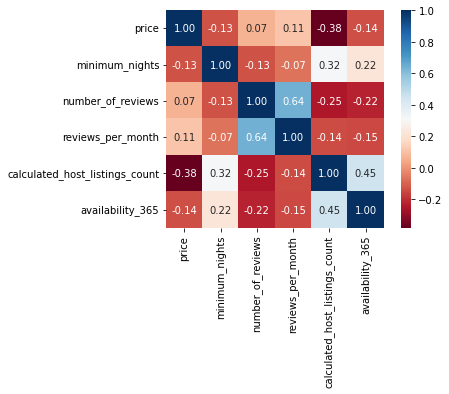

In [69]:
# plotar um heatmap a partir das correlações
# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. 

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [70]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       3165
Entire home/apt    2249
Shared room         344
Hotel room          100
Name: room_type, dtype: int64

In [71]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.540287
Entire home/apt    0.383919
Shared room        0.058723
Hotel room         0.017071
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [72]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]




neighbourhood
Southern             1039.540541
Islands              1015.926070
Kwai Tsing            954.857143
Tai Po                819.913043
Sai Kung              793.985075
Tsuen Wan             600.214286
Central & Western     592.952009
Wong Tai Sin          543.142857
Eastern               541.672414
Kwun Tong             508.296296
Name: price, dtype: float64

In [73]:
# ver quantidade de imóveis no Southern
print(df_clean[df_clean.neighbourhood == "Southern"].shape)

# ver quantidade de imóveis no Kwun Tong 
print(df_clean[df_clean.neighbourhood == "Kwun Tong"].shape)

(37, 17)
(27, 17)


Acima podemos ver que apenas o bairro Kwun Tong prática preço dentro da média enquanto o Southern está com uma variação superior a 100% em relação ao Kwun Tong, porém possui mais registros do que este.
Portanto, para ter mais clareza quanto aos preços praticados teriamos que ir mais afundo para investigar essa variação.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


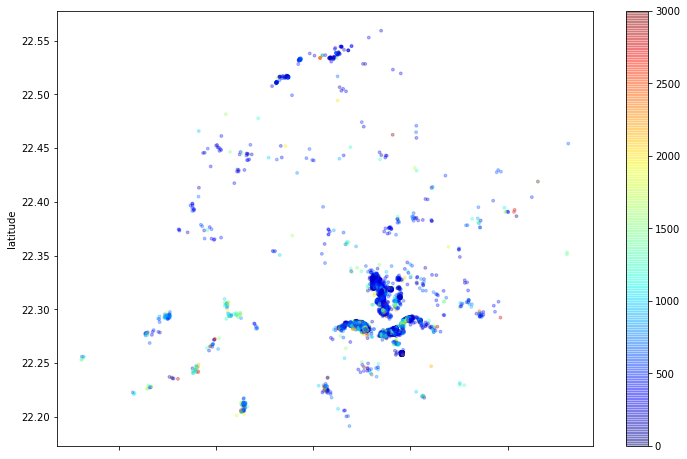

In [74]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.3, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [75]:

#plotar os imóveis pela latitude e longitude
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name="name", color_discrete_sequence=["blue"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Vamos verificar qual a quantidade mínima de noites que em média é práticado na rede Airbnb na cidade de Hong Kong

In [76]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

17.03448275862069

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

É possível constatar que o tipo de imóvel mais alugado é o private_room com 54% do total do dataset, também verificamos que apenas 1 bairro entre os top 10 tem o preço dentro da média.

Nota-se que existe uma concentração de pontos na região sudeste.

Outra constatação é a quantidade média de minimo de noites para alugar, que são 17 dias, ou seja, mais da metade de um mês.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.